# Applications of Convex Optimisation

In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Subgradients

Text(0.5, 1.0, 'Various subgradients of f(x)=|x|')

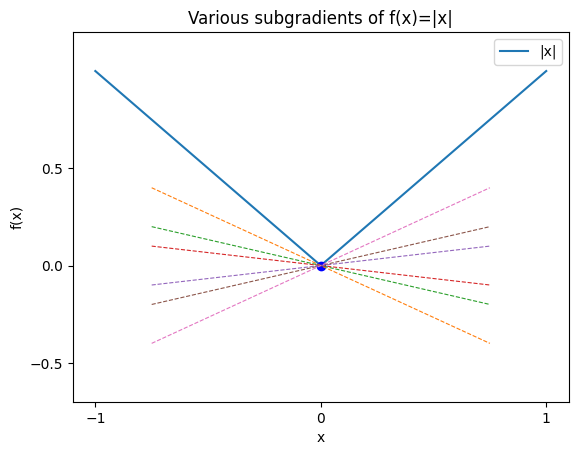

In [3]:
f = lambda x: np.abs(x)
x = np.linspace(-1,1,1000)
x1 = np.linspace(-0.75, 0.75, 1000)

g1 = lambda x: -0.4*x
g2 = lambda x: -0.2*x
g3 = lambda x: -0.1*x
g4 = lambda x: 0.1*x
g5 = lambda x: 0.2*x
g6 = lambda x: 0.4*x

plt.plot(x, f(x), label="|x|")
plt.plot(0,0, marker='o', color="blue")
plt.plot(x1, g1(x), ls="dashed", lw=0.8)
plt.plot(x1, g2(x), ls="dashed", lw=0.8)
plt.plot(x1, g3(x), ls="dashed", lw=0.8)
plt.plot(x1, g4(x), ls="dashed", lw=0.8)
plt.plot(x1, g5(x), ls="dashed", lw=0.8)
plt.plot(x1, g6(x), ls="dashed", lw=0.8)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.legend()
plt.xticks(np.array([-1,0,1]))
plt.yticks(np.array([-0.5,0,0.5]))

plt.ylim(-0.7, 1.2)

plt.title("Various subgradients of f(x)=|x|")

## Beta smooth and alpha strong convexity

In [79]:
offset = 1.3
theta = 90

f = lambda x: 0.2*x**2

alpha = lambda x: 0.4*offset*(x-1.3) + f(offset)


bound = lambda x: 

#bound = lambda x: 0.4*offset*(x*np.cos(45)-1.3)**2 + f(offset)



(-0.3, 2.0)

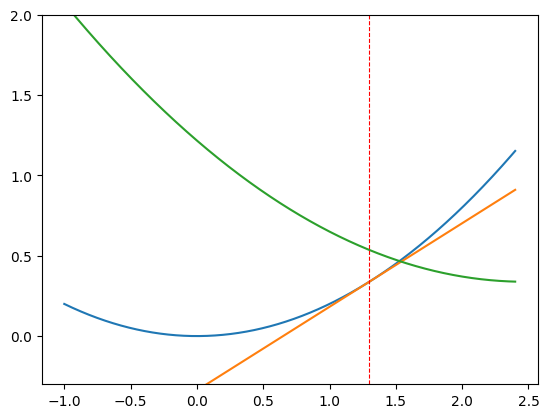

In [81]:
x = np.linspace(-1,2.4, 5000)

plt.plot(x, f(x), label="0.1x^2")
plt.plot(x, alpha(x), label="2(x-1)^2")
plt.plot(x, bound(x), label="2(x-1)^2")

plt.vlines(1.3, -0.3, 2, color="red", ls="dashed", lw=0.8)

plt.ylim(-0.3, 2)

## Projected Gradient Descent

Say we have a 1-dimnsional example, with $f(x)=x^{2}$, and we bound on $x \in [-5, 5]$. Let's see what this looks like

In [4]:
f = lambda x: x**2
df = lambda x: 2*x

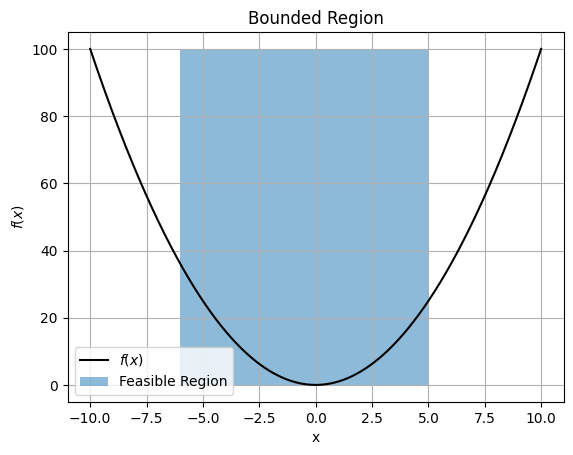

In [5]:
lim = 10
feas = 6

plt.plot(np.linspace(-lim, lim,1000), f(np.linspace(-lim,lim,1000)), color="black", label=r"$f(x)$")
plt.xlabel("x")
plt.ylabel(r"$f(x)$")
plt.title("Bounded Region")
plt.fill_between(range(-feas, feas), 0, max(f(np.linspace(-lim, lim,1000))), alpha=0.5, label="Feasible Region")
plt.grid()
plt.legend()

In [28]:
def proj_grad_desc(x1, grad, lr, feas=[-6, 6], tol=1e-5, max_iter=100):
    
    i = 0
    loss = np.inf
    vals = [x1]
    losses = []
    
    stop_crit = ""
    
    while i < max_iter and loss > tol:
        
        xtp1 = vals[-1]-lr*grad(vals[-1]) # I don't know how to calculate the subgradient
        
        #print(xtp1)
        
        if xtp1 < feas[0]:
            xtp1 = feas[0]
        elif xtp1 > feas[1]:
            xtp1 = feas[1]
        #print(xtp1)
        #print("\n")
        vals.append(xtp1)
        
        i += 1
        loss = np.abs(vals[-2]-vals[-1])
        losses.append(loss)
        
    if i >= max_iter:
        stop_crit = "max_iter"
    else:
        stop_crit = "loss"
        
    return {"Optimum": vals[-1],
           "StopCrit": stop_crit,
           "Steps": np.array(vals),
           "Loss": np.array(losses)}       

In [29]:
proj = proj_grad_desc(100, df, 0.1, feas=[-60, 60])

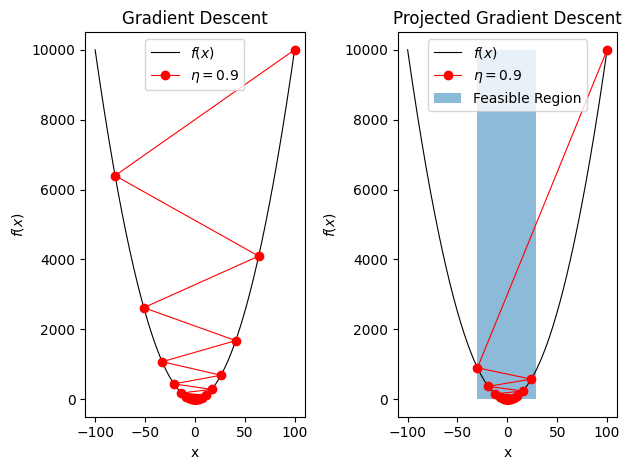

In [31]:
lim = 100
feas = [-30,30]
lr = 0.9
x1 = 100

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(np.linspace(-lim, lim,1000), f(np.linspace(-lim,lim,1000)), color="black", label=r"$f(x)$", lw=0.8)
ax1.plot(grad_desc(x1, df, lr)["Steps"], f(grad_desc(x1, df, lr)["Steps"]), color="red", marker='o', label=r'$\eta=0.9$', lw=0.8)
ax1.set(xlabel="x", ylabel=r"$f(x)$", title="Gradient Descent")
ax1.legend()


ax2.plot(np.linspace(-lim, lim, 1000), f(np.linspace(-lim, lim,1000)), color="black", label=r"$f(x)$", lw=0.8)
ax2.plot(proj_grad_desc(x1, df, lr, feas)["Steps"], f(proj_grad_desc(x1, df, lr, feas)["Steps"]), color="red", marker='o', label=r'$\eta=0.9$', lw=0.8)
ax2.fill_between(range(feas[0], feas[1]), 0, max(f(np.linspace(-lim, lim, 1000))), alpha=0.5, label="Feasible Region")

ax2.set(xlabel="x", ylabel=r"$f(x)$", title="Projected Gradient Descent")
ax2.legend()

fig.tight_layout()

#fig.savefig('PDG.png')

## Gradient Descent for Smooth Functions

In [4]:
f = lambda x: x**2
df = lambda x: 2*x

In [12]:
def grad_desc(x1, grad, lr, tol=1e-10, max_iter=100):
    i = 0
    loss = np.inf
    vals = [x1]
    losses = []
    
    stop_crit = ""
    
    while i < max_iter:# and loss > tol:
        
        vals.append(vals[-1]-lr*grad(vals[-1]))
        
        i += 1
        loss = np.abs(vals[-2]-vals[-1])
        losses.append(loss)
        
    if i >= max_iter:
        stop_crit = "max_iter"
    else:
        stop_crit = "loss"
        
    return {"Optimum": vals[-1],
           "StopCrit": stop_crit,
           "Steps": np.array(vals),
           "Loss": np.array(losses)}       
    
    

In [13]:
grad_desc(100, df, 0.7)["Steps"]

array([ 1.00000000e+02, -4.00000000e+01,  1.60000000e+01, -6.40000000e+00,
        2.56000000e+00, -1.02400000e+00,  4.09600000e-01, -1.63840000e-01,
        6.55360000e-02, -2.62144000e-02,  1.04857600e-02, -4.19430400e-03,
        1.67772160e-03, -6.71088640e-04,  2.68435456e-04, -1.07374182e-04,
        4.29496730e-05, -1.71798692e-05,  6.87194767e-06, -2.74877907e-06,
        1.09951163e-06, -4.39804651e-07,  1.75921860e-07, -7.03687442e-08,
        2.81474977e-08, -1.12589991e-08,  4.50359963e-09, -1.80143985e-09,
        7.20575940e-10, -2.88230376e-10,  1.15292150e-10, -4.61168602e-11,
        1.84467441e-11, -7.37869763e-12,  2.95147905e-12, -1.18059162e-12,
        4.72236648e-13, -1.88894659e-13,  7.55578637e-14, -3.02231455e-14,
        1.20892582e-14, -4.83570328e-15,  1.93428131e-15, -7.73712525e-16,
        3.09485010e-16, -1.23794004e-16,  4.95176016e-17, -1.98070406e-17,
        7.92281625e-18, -3.16912650e-18,  1.26765060e-18, -5.07060240e-19,
        2.02824096e-19, -

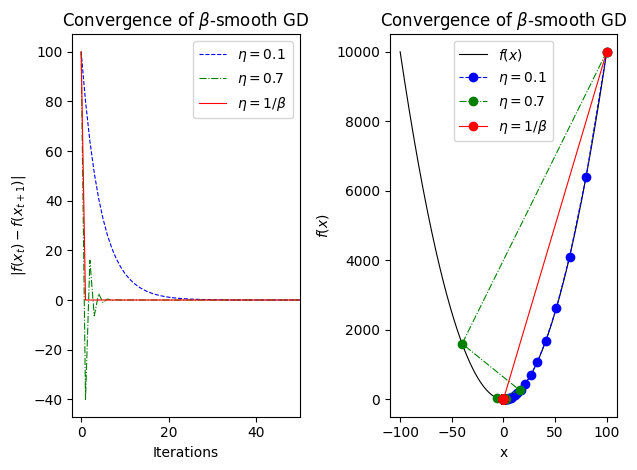

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(grad_desc(100, df, 0.1)["Steps"], label=r'$\eta=0.1$', color="blue", lw=0.8, ls="--")
#ax1.plot(grad_desc(100, df, 0.05)["Steps"], label=r'$\eta=0.05$', color="orange")
ax1.plot(grad_desc(100, df, 0.7)["Steps"], label=r'$\eta=0.7$', color="green", lw=0.8, ls="-.")
ax1.plot(grad_desc(100, df, 0.5)["Steps"], label=r'$\eta=1/\beta$', color="red", lw=0.8)

ax1.set(xlabel="Iterations", ylabel=r"$|f(x_{t})-f(x_{t+1})|$", title=r"Convergence of $\beta$-smooth GD")
ax1.legend()
ax1.set_xlim(-2, 50)


ax2.plot(np.linspace(-100,100,1000), f(np.linspace(-100,100,1000)), color="black", label=r"$f(x)$", lw=0.8)
ax2.plot(grad_desc(100, df, 0.1)["Steps"], f(grad_desc(100, df, 0.1)["Steps"]), color="blue", marker='o', label=r'$\eta=0.1$', lw=0.8, ls="--")
ax2.plot(grad_desc(100, df, 0.7)["Steps"], f(grad_desc(100, df, 0.7)["Steps"]), color="green", marker='o', label=r'$\eta=0.7$', lw=0.8, ls="-.")
ax2.plot(grad_desc(100, df, 0.5)["Steps"], f(grad_desc(100, df, 0.5)["Steps"]), color="red", marker='o', label=r'$\eta=1/\beta$', lw=0.8)

ax2.set(xlabel="x", ylabel=r"$f(x)$", title=r"Convergence of $\beta$-smooth GD")
ax2.legend()

fig.tight_layout()

### Theorem 3.3 Bubeck

$$f(x_{t})-f(x^{*}) \leq 2\beta\|x_{1}-x^{*}\|^{2} / t-1$$

In [15]:
test = grad_desc(100, df, 0.1)

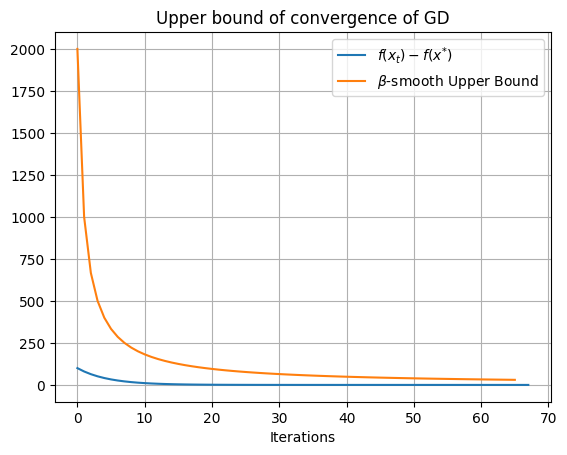

In [16]:
plt.plot(test["Steps"], label=r"$f(x_{t})-f(x^{*})$") # f(xt) - f(x*) = f(xt)-0 = f(xt)
plt.plot([2*0.1*np.linalg.norm(100 - test["Optimum"])**2 / (t-1) for t in range(2, len(test["Steps"]))], label=r"$\beta$-smooth Upper Bound")
plt.ylim([-100,2100])
plt.xlabel("Iterations")
plt.ylabel("")
plt.title("Upper bound of convergence of GD")
plt.grid()
plt.legend()

In [17]:
2*0.1*(np.linalg.norm(100 - test["Optimum"]))**2

1999.9987144497711

## Evaluate the improvement in one step of GD

$$f\left(x-(1/\beta\nabla f(x)\right)-f(x)\leq -(1/2\beta)\|\nabla f(x)\|^{2}$$

Let $$\eta = 1/\beta = 0.1$$. We have 

In [18]:
gd1 = grad_desc(100, df, 0.1)

In [19]:
gd1["Steps"][:-1]

array([1.00000000e+02, 8.00000000e+01, 6.40000000e+01, 5.12000000e+01,
       4.09600000e+01, 3.27680000e+01, 2.62144000e+01, 2.09715200e+01,
       1.67772160e+01, 1.34217728e+01, 1.07374182e+01, 8.58993459e+00,
       6.87194767e+00, 5.49755814e+00, 4.39804651e+00, 3.51843721e+00,
       2.81474977e+00, 2.25179981e+00, 1.80143985e+00, 1.44115188e+00,
       1.15292150e+00, 9.22337204e-01, 7.37869763e-01, 5.90295810e-01,
       4.72236648e-01, 3.77789319e-01, 3.02231455e-01, 2.41785164e-01,
       1.93428131e-01, 1.54742505e-01, 1.23794004e-01, 9.90352031e-02,
       7.92281625e-02, 6.33825300e-02, 5.07060240e-02, 4.05648192e-02,
       3.24518554e-02, 2.59614843e-02, 2.07691874e-02, 1.66153499e-02,
       1.32922800e-02, 1.06338240e-02, 8.50705917e-03, 6.80564734e-03,
       5.44451787e-03, 4.35561430e-03, 3.48449144e-03, 2.78759315e-03,
       2.23007452e-03, 1.78405962e-03, 1.42724769e-03, 1.14179815e-03,
       9.13438523e-04, 7.30750819e-04, 5.84600655e-04, 4.67680524e-04,
      

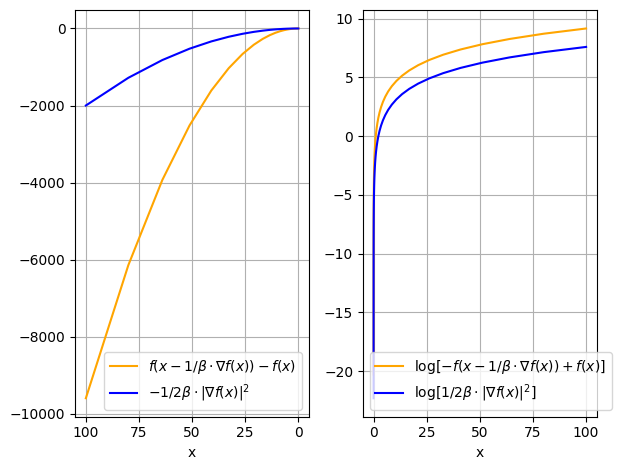

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(gd1["Steps"][:-1], f(gd1["Loss"])-f(gd1["Steps"][:-1]), color="orange", label=r"$f(x-1/\beta\cdot \nabla f(x))-f(x)$")
ax1.plot(gd1["Steps"][:-1], (-0.5*0.1*np.linalg.norm(df(gd1["Steps"]).reshape(-1,1), axis=1)**2)[:-1], color="blue", label=r"$-1/2\beta \cdot \|\nabla f(x)\|^{2}$")
ax1.invert_xaxis()
ax1.set(xlabel="x") #, ylabel=r"$f(x-1/\beta\cdot \nabla f(x))-f(x)$")
ax1.legend()
ax1.grid()

ax2.plot(gd1["Steps"][:-1], np.log(-f(gd1["Loss"])+f(gd1["Steps"][:-1])), color="orange", label=r"$\log[-f(x-1/\beta\cdot \nabla f(x))+f(x)]$")
ax2.plot(gd1["Steps"], np.log(0.5*0.1*np.linalg.norm(df(gd1["Steps"]).reshape(-1,1), axis=1)**2), color="blue", label=r"$\log[1/2\beta \cdot \|\nabla f(x)\|^{2}]$")
ax2.set(xlabel="x") #, ylabel=r"$\log[f(x-1/\beta\cdot \nabla f(x))-f(x)]$")
ax2.legend()
ax2.grid()



plt.tight_layout()
plt.rcParams['figure.figsize'] = [10, 5]

In [21]:
# Check all are positive 
pos_check = np.all((-0.5*0.1*np.linalg.norm(df(gd1["Steps"]).reshape(-1,1), axis=1)**2)[:-1]-(f(gd1["Loss"])-f(gd1["Steps"][:-1]))>=0)
print(f"Inequality holds is: {pos_check}")

Inequality holds is: True


## Mirror Descent

## Strong convexity

### Strong convexity checker

In [22]:
f1 = lambda x: x**2
df1 = lambda x: 2*x

In [23]:
# Tries to evaluate the value of alpha

def sc_check(f, df):
    
    x = np.random.uniform(-100, 100, 1000000)
    y = np.random.uniform(-100, 100, 1000000)
    
    form = ((2*f(y)) - (2*f(x)) + (2*df(x).T*(x-y))) / (np.linalg.norm((x-y).T.reshape(-1,1), axis=1)**2)
    
    return np.round(np.min(form), 2)

In [24]:
f2 = lambda x: np.sin(x)
df2 = lambda x: np.cos(x)

In [25]:
sc_check(f2, df2)

-1.0

In [26]:
f3 = lambda x: x**3
df3 = lambda x: 3*x**2

In [27]:
sc_check(f3, df3)

-599.61

In [28]:
f4 = lambda x: np.exp(x)
df4 = lambda x: np.exp(x)

In [29]:
sc_check(f4, df4)

0.0

In [30]:
f4 = lambda x: x**4
df4 = lambda x: 4*x**3

In [31]:
sc_check(f4, df4)

0.02

# Lipschitz Continuity

In [6]:
def example(x, lam):
    
    return np.where(x > 0, np.exp(-lam*x), 1)

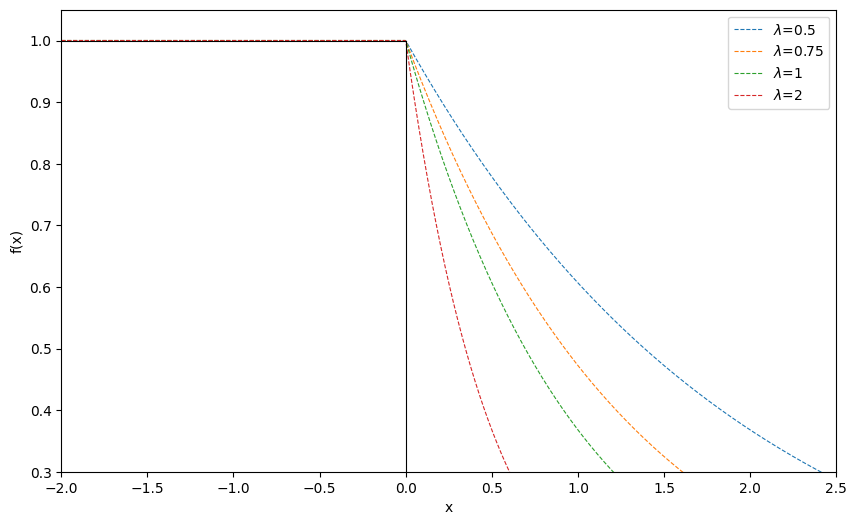

In [107]:
lams = [0.5, 0.75, 1, 2]

for i, lam in enumerate(lams):
        plt.plot(np.linspace(-2,3,1000), example(np.linspace(-2,3,1000), lam),
                 label = fr"$\lambda$={lams[i]}",
                 ls="dashed",
                lw=0.8)
        
plt.plot(np.linspace(-2,0,100), np.ones(100), color="black", lw=0.8)
plt.vlines(0, 0, 1, colors="black", lw=0.8)         

plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim((0.3,1.05))
plt.xlim((-2,2.5))
plt.legend()
# plt.grid()
plt.rcParams["figure.figsize"] = (10,6)

plt.savefig("LipschitzExample.png", dpi=300, pad_inches=0.05)

### Beta smooth and alpha strong convexity

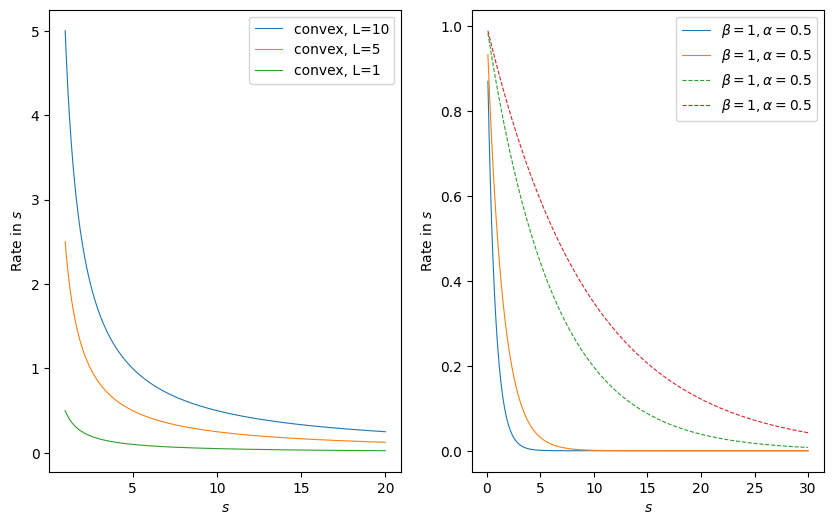

In [122]:
fig, (ax1, ax2) = plt.subplots(1,2)

s = np.linspace(1, 20, 1000)
Ls = [10, 5, 1]

for l in Ls:
    ax1.plot(s, l/(2*s), label=fr"convex, L={l}", lw=0.8)

ax1.set(xlabel=r"$s$", ylabel=r"Rate in $s$") #, ylabel=r"$f(x-1/\beta\cdot \nabla f(x))-f(x)$")
ax1.legend()

s = np.linspace(0.1, 30, 1000)

ax2.plot(s, (1-(0.75/1))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8)
ax2.plot(s, (1-(0.5/1))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8)
ax2.plot(s, (1-(0.75/5))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8, ls="dashed")
ax2.plot(s, (1-(0.5/5))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8, ls="dashed")
        
ax2.set(xlabel=r"$s$", ylabel=r"Rate in $s$") #, ylabel=r"$f(x-1/\beta\cdot \nabla f(x))-f(x)$")
ax2.legend()



Text(0.5, 0, 's')

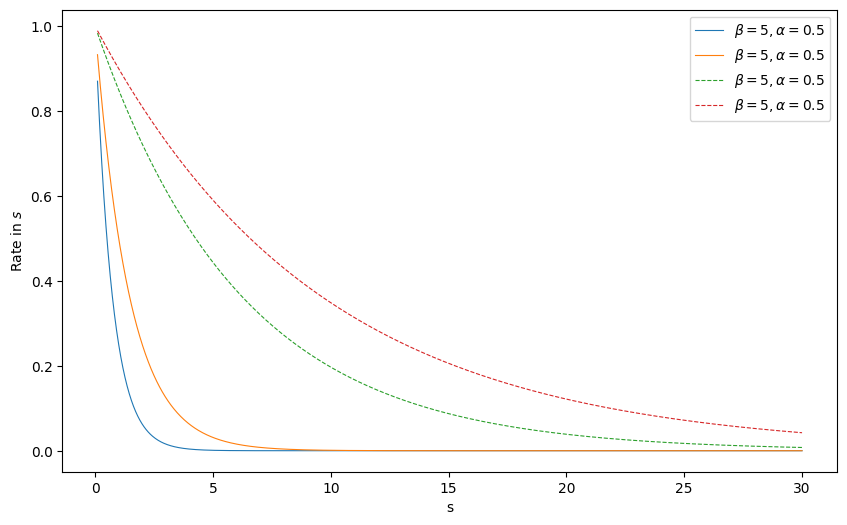

In [121]:
s = np.linspace(0.1, 30, 1000)
Ls = [1, 5]
Ms = [0.75, 0.5]

plt.plot(s, (1-(0.75/1))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8)
plt.plot(s, (1-(0.5/1))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8)
plt.plot(s, (1-(0.75/5))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8, ls="dashed")
plt.plot(s, (1-(0.5/5))**s, label=fr"$\beta={l}, \alpha={m}$", lw=0.8, ls="dashed")
        

plt.legend()
plt.ylabel(r"Rate in $s$")
plt.xlabel("s")
